IMPORT LIBRARIES AND PACKAGES

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt


# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [2]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay,  classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

IMPORT FILES

In [3]:
df = pd.read_csv(r"C:\Users\USER\Desktop\Churn_Content\Churn_model.csv")
df.head()

,Age,Gender,MaritalStatus,IncomeLevel,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,AmountSpent,ProductCategory,MonthYear,ChurnStatus,IncomeLevelClass
0,62.0,M,Single,Low,2022-03-31,Inquiry,Resolved,2023-10-21,34.0,Mobile App,416.50,Electronics,2022-03,0.0,1
1,65.0,M,Married,Low,2022-03-17,Inquiry,Resolved,2023-12-05,5.0,Website,54.96,Clothing,2022-08,1.0,1
2,18.0,M,Single,Low,2022-08-24,Inquiry,Resolved,2023-11-15,3.0,Website,197.50,Electronics,2022-07,0.0,1
3,21.0,M,Widowed,Low,2022-11-18,Inquiry,Resolved,2023-08-25,2.0,Website,101.31,Furniture,2022-01,0.0,1
4,21.0,M,Divorced,Medium,2022-07-03,Inquiry,Unresolved,2023-10-27,41.0,Website,397.37,Clothing,2022-07,0.0,2


EXPLORATORY DATA ANALYSIS

In [4]:
# Convert dates to datetime format
df['InteractionDate'] = pd.to_datetime(df['InteractionDate'])
df['LastLoginDate'] = pd.to_datetime(df['LastLoginDate'])

In [5]:
# Feature engineering: calculate days since last login
df["DaysSinceLastLogin"] = (df["LastLoginDate"] - df["InteractionDate"]).dt.days

In [6]:
df.select_dtypes("number").describe()

,Age,LoginFrequency,AmountSpent,ChurnStatus,IncomeLevelClass,DaysSinceLastLogin
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,43.267000,25.912000,252.95750,0.204000,2.024000,367.972000
std,15.242311,14.055953,141.79867,0.403171,0.821035,147.483289
min,18.000000,1.000000,5.86000,0.000000,1.000000,21.000000
25%,30.000000,13.750000,128.65250,0.000000,1.000000,269.000000
50%,43.000000,27.000000,249.88500,0.000000,2.000000,367.000000
75%,56.000000,38.000000,376.81250,0.000000,3.000000,471.250000
max,69.000000,49.000000,499.56000,1.000000,3.000000,713.000000


<Axes: >

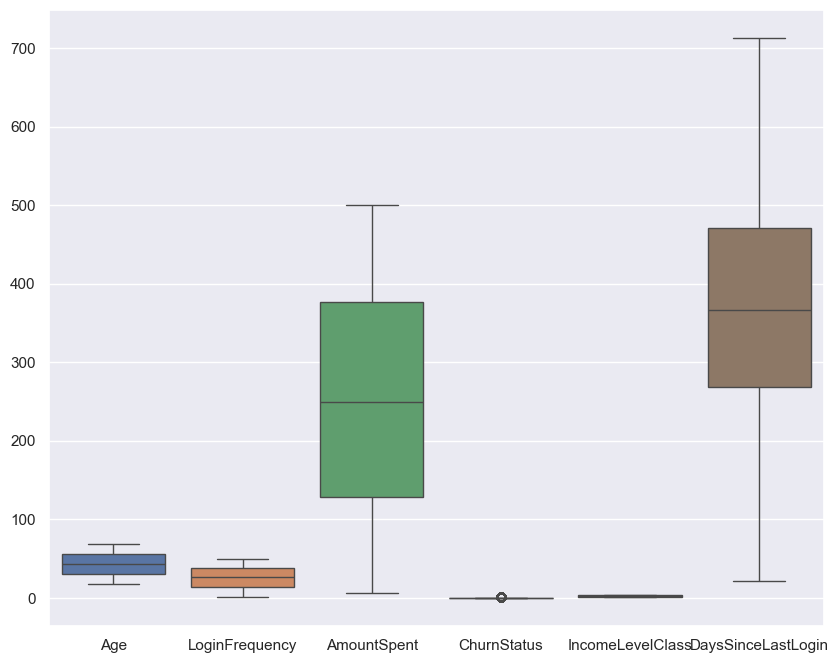

In [9]:
plt.figure(figsize=(10, 8))
sns.boxplot(df.select_dtypes("number"))

In [6]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 1000 non-null   float64       
 1   Gender              1000 non-null   object        
 2   MaritalStatus       1000 non-null   object        
 3   IncomeLevel         1000 non-null   object        
 4   InteractionDate     1000 non-null   datetime64[ns]
 5   InteractionType     1000 non-null   object        
 6   ResolutionStatus    1000 non-null   object        
 7   LastLoginDate       1000 non-null   datetime64[ns]
 8   LoginFrequency      1000 non-null   float64       
 9   ServiceUsage        1000 non-null   object        
 10  AmountSpent         1000 non-null   float64       
 11  ProductCategory     1000 non-null   object        
 12  MonthYear           1000 non-null   object        
 13  ChurnStatus         1000 non-null   float64      

In [7]:
# Drop unnecessary columns
df.drop(['Gender', 'InteractionDate', 'LastLoginDate', 'InteractionType', "MonthYear", "IncomeLevelClass"], axis=1, inplace=True)

In [17]:
df.head()

,Age,MaritalStatus,IncomeLevel,ResolutionStatus,LoginFrequency,ServiceUsage,AmountSpent,ProductCategory,ChurnStatus,DaysSinceLastLogin
0,62.0,2,1,0,34.0,0,416.50,2,0.0,569
1,65.0,1,1,0,5.0,2,54.96,1,1.0,628
2,18.0,2,1,0,3.0,2,197.50,2,0.0,448
3,21.0,3,1,0,2.0,2,101.31,3,0.0,280
4,21.0,0,2,1,41.0,2,397.37,1,0.0,481


CLASSIFYING CATEGORICAL DATASET

In [8]:
# Encode categorical features
label_encoders = {}
categorical_columns = ["MaritalStatus", "IncomeLevel", "ServiceUsage", "ProductCategory", "ResolutionStatus"]

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

DATA SAMPLING: 
Spliting dataset into test and training sample

In [9]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df["ChurnStatus"]
X = df.drop(columns=["ChurnStatus"])
print(X.shape)
print(y.shape)

(1000, 9)
(1000,)


In [10]:
# Standardize numerical features
scaler = StandardScaler()
X[['Age', 'LoginFrequency', 'AmountSpent', 'DaysSinceLastLogin']] = scaler.fit_transform(
    X[['Age', 'LoginFrequency', 'AmountSpent', 'DaysSinceLastLogin']]
)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(750, 9)
(750,)
(250, 9)
(250,)


MODEL TRAINING : For this model we will use RandomForestClassifier to build the model

In [12]:
model = RandomForestClassifier(n_estimators=1000, random_state=42) 
model.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=1000, random_state=42)

MODEL EVALUATION

In [13]:
# Generate predictions here!
y_pred = model.predict(X_test)
# Calculating accuracy score for the model
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)
print("Model Training Accuracy:", round(acc_train, 2))
print("Model Test Accuracy:", round(acc_test, 2))

Model Training Accuracy: 1.0
Model Test Accuracy: 0.75


CALCULATION OF PRECISION, RECALL AND F1-SCORE

In [14]:
class_report = classification_report(y_test, model.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

         0.0       0.76      0.97      0.86       190
         1.0       0.38      0.05      0.09        60

    accuracy                           0.75       250
   macro avg       0.57      0.51      0.47       250
weighted avg       0.67      0.75      0.67       250



PLOTING A CONFUSION MATRIX

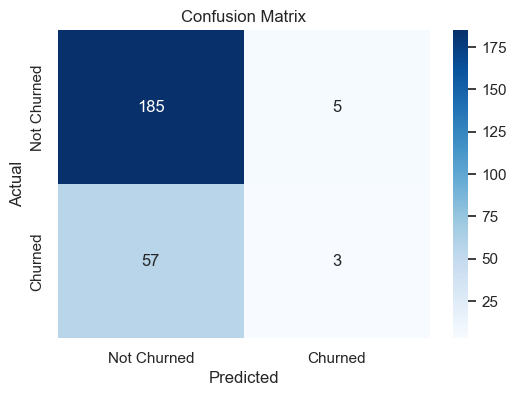

In [15]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

COMMUNICATION : Ploting Ten importance Feature of the Model

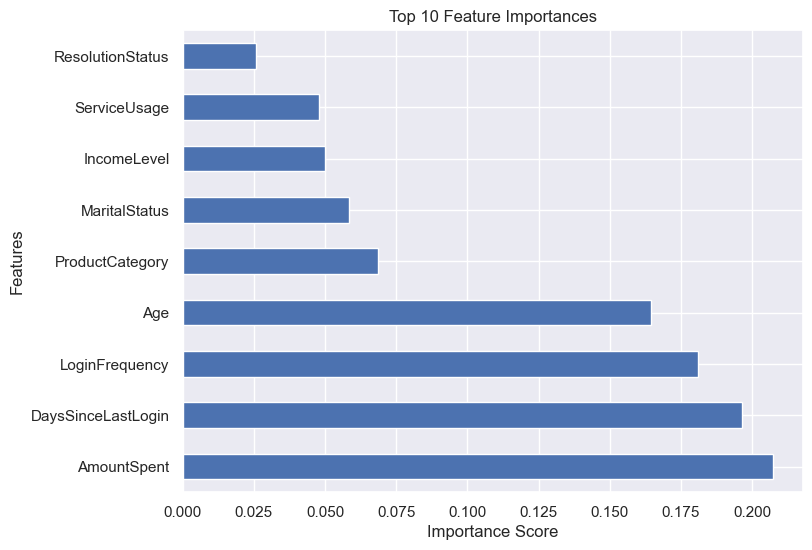

In [16]:
# Feature importance plot
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values()
feature_importances.nlargest(10).plot(kind='barh', figsize=(8, 6))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()